In [ ]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score

Далее загрузим набор данных MNIST:

In [ ]:
mnist = load_digits()

In [ ]:
type(mnist)

sklearn.utils._bunch.Bunch

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
# Рассмотрим данные в удобной форме
pd.DataFrame(mnist.data).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


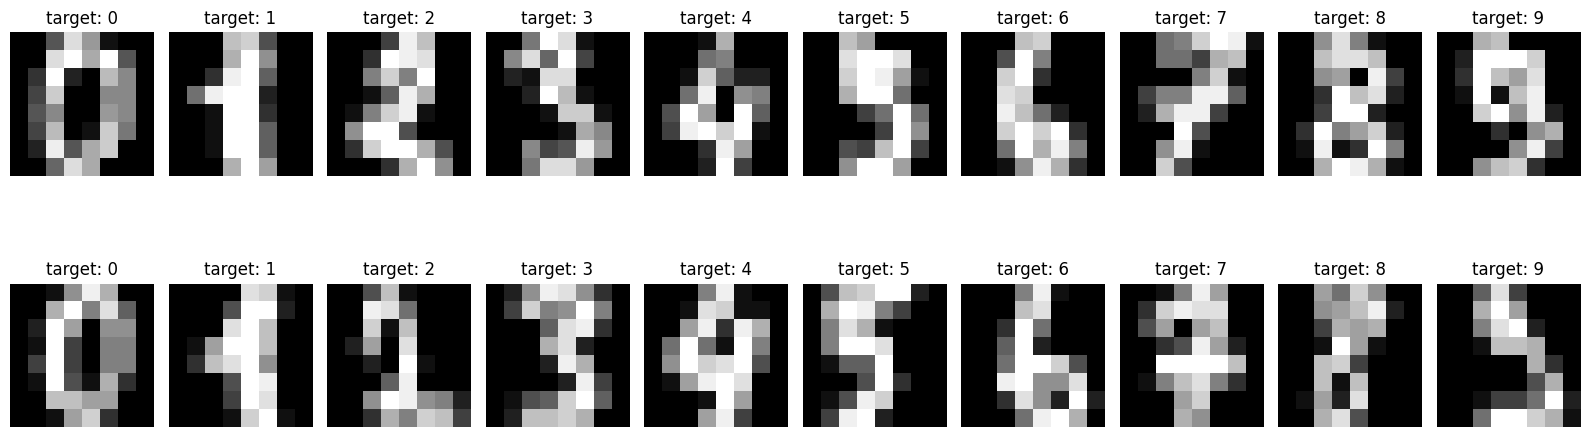

In [ ]:
# Визуализация изображений
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(mnist.images[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")

plt.tight_layout()

In [ ]:
# Структура ответов:
pd.DataFrame(mnist.target).head()

,0
0,0
1,1
2,2
3,3
4,4


In [ ]:
# Разделение данных на изображения и расшифровки к ним:
X, y = pd.DataFrame(mnist.data), pd.DataFrame(mnist.target)
print(X)
print(y)

       0    1     2     3     4     5    6    7    8    9   ...   54   55  \
0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  4.0  0.0   
1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  ...  1.0  0.0   
1794  0.0  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  2.0  0.0   
1796  0.0  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  ...  8.0  0.0   

       56   57   58    59    60    61   62   63  
0     0.0  0.0  6.0  13.0

In [ ]:
# Разделяем данные на обучающую и тестовую выборки
# данные разделеные в отношение 70 к 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)

80448
34560
1257
540


In [ ]:
# Создаем модель логистической регрессии
model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)

# Обучаем модель на обучающей выборке
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=2000, multi_class='multinomial')

In [ ]:
# Делаем предсказания на тестовой выборке
y_pred = model.predict(X_test)

In [ ]:
# Вычисляем метрики
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
confusion_mat = confusion_matrix(y_test, y_pred)

# Выводим результаты
print("\nМатрица потерь:\n", confusion_mat)
print(f"Точность модели: {accuracy:.4f}")
print(f"Полнота (Recall): {recall:.4f}")
print(f"F1 мера: {f1:.4f}")

Точность модели: 0.9722
Полнота (Recall): 0.9730
F1 мера: 0.9721

Матрица потерь:
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 47  1  0  0  0  0  0  2  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  1  0  0 59  0  0  0  0  0]
 [ 0  1  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  1  0 54  0  0]
 [ 0  0  0  0  0  1  0  0 42  0]
 [ 0  0  0  1  0  0  0  0  2 56]]


In [ ]:
# Список размерностей для PCA
n_components_list = [2, 5, 10, 20, 30, 40, 50, 60, 64]

In [ ]:
# используем статистический метод для уменьшения размерности векторов:
from sklearn.decomposition import PCA
# добавим время для оценки продолжительности выполнения:
import time

# Цикл по различным размерностям
for n_components in n_components_list:
    # Замеряем время начала
    start_time = time.time()

    # Создаем модель PCA
    pca = PCA(n_components=n_components)

    # Проецируем данные на меньшее пространство
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Создаем модель логистической регрессии
    model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)

    # Обучаем модель на преобразованных данных
    model.fit(X_train_pca, y_train)

    # Делаем предсказания на тестовой выборке
    y_pred = model.predict(X_test_pca)

    # Вычисляем метрики
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Замеряем время окончания
    end_time = time.time()

    # Выводим результаты
    print(f"Размерность: {n_components}")
    print(f"Время выполнения: {end_time - start_time:.4f} секунд")
    print(f"Точность модели: {accuracy:.4f}")
    print(f"Полнота (Recall): {recall:.4f}")
    print(f"F1 мера: {f1:.4f}")
    print("\nМатрица потерь:\n", confusion_mat)
    print("-" * 20)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Размерность: 2
Время выполнения: 0.5951 секунд
Точность модели: 0.6315
Полнота (Recall): 0.6349
F1 мера: 0.6196

Матрица потерь:
 [[47  0  0  0  0  1  5  0  0  0]
 [ 1 27  0  0  3  2  0  3 12  2]
 [ 0  1 34  3  0  1  0  1  7  0]
 [ 0  0  5 39  0  2  0  1  0  7]
 [ 0  3  0  0 51  0  6  0  0  0]
 [ 2 10  5  0  0 10  3  8  9 19]
 [ 7  0  0  0  2  0 44  0  0  0]
 [ 0 10  6  0  0  1  0 34  4  0]
 [ 0  5  7  0  0  9  0  6 15  1]
 [ 0  1  4  6  0  3  1  3  1 40]]
--------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Размерность: 5
Время выполнения: 0.7132 секунд
Точность модели: 0.8463
Полнота (Recall): 0.8410
F1 мера: 0.8401

Матрица потерь:
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 37  1  0  3  2  0  0  4  3]
 [ 0  0 38  1  0  0  0  0  8  0]
 [ 0  1  3 45  0  0  0  1  1  3]
 [ 0  2  0  0 56  0  0  1  1  0]
 [ 0  1  0  0  2 59  0  0  2  2]
 [ 3  0  0  0  0  0 49  0  1  0]
 [ 0  0  5  0  0  0  0 48  1  1]
 [ 1  2  4  3  0  1  0  1 29  2]
 [ 0  1  2  6  1  1  0  4  1 43]]
--------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Размерность: 10
Время выполнения: 0.6326 секунд
Точность модели: 0.9130
Полнота (Recall): 0.9108
F1 мера: 0.9092

Матрица потерь:
 [[50  0  1  0  0  1  0  1  0  0]
 [ 0 39  3  1  1  0  0  1  3  2]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  1  1 51  0  0  0  0  1  0]
 [ 0  2  0  0 58  0  0  0  0  0]
 [ 0  0  1  0  1 60  0  0  2  2]
 [ 4  0  0  0  0  0 48  0  1  0]
 [ 1  0  0  0  0  0  0 53  0  1]
 [ 1  1  2  3  0  1  0  0 35  0]
 [ 1  1  0  2  0  1  0  0  2 52]]
--------------------
Размерность: 20
Время выполнения: 0.6513 секунд
Точность модели: 0.9481
Полнота (Recall): 0.9507
F1 мера: 0.9491

Матрица потерь:
 [[50  0  0  0  0  1  1  1  0  0]
 [ 0 48  2  0  0  0  0  0  0  0]
 [ 0  1 46  0  0  0  0  0  0  0]
 [ 0  0  1 51  0  1  0  1  0  0]
 [ 0  1  0  0 57  0  2  0  0  0]
 [ 0  1  1  0  1 59  1  0  0  3]
 [ 1  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  2]
 [ 0  0  0  0  0  1  0  0 42  0]
 [ 0  1  0  2  0  0  0  0  2 54]]
--------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Размерность: 30
Время выполнения: 0.7977 секунд
Точность модели: 0.9648
Полнота (Recall): 0.9636
F1 мера: 0.9635

Матрица потерь:
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 45  2  0  0  0  0  1  2  0]
 [ 0  1 46  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  1  0  0 59  0  0  0  0  0]
 [ 0  0  0  0  0 64  1  0  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  1  1  0 53  0  0]
 [ 0  2  0  0  0  1  0  0 40  0]
 [ 0  0  0  0  0  0  0  0  2 57]]
--------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Размерность: 40
Время выполнения: 0.6538 секунд
Точность модели: 0.9741
Полнота (Recall): 0.9747
F1 мера: 0.9740

Матрица потерь:
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 47  1  0  0  0  0  0  2  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  1  0  0 59  0  0  0  0  0]
 [ 0  1  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  1  0 54  0  0]
 [ 0  0  0  0  0  1  0  0 42  0]
 [ 0  0  0  1  0  0  0  0  1 57]]
--------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Размерность: 50
Время выполнения: 0.6525 секунд
Точность модели: 0.9722
Полнота (Recall): 0.9730
F1 мера: 0.9721

Матрица потерь:
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 47  1  0  0  0  0  0  2  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  1  0  0 59  0  0  0  0  0]
 [ 0  1  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  1  0 54  0  0]
 [ 0  0  0  0  0  1  0  0 42  0]
 [ 0  0  0  1  0  0  0  0  2 56]]
--------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Размерность: 60
Время выполнения: 0.6650 секунд
Точность модели: 0.9722
Полнота (Recall): 0.9730
F1 мера: 0.9721

Матрица потерь:
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 47  1  0  0  0  0  0  2  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  1  0  0 59  0  0  0  0  0]
 [ 0  1  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  1  0 54  0  0]
 [ 0  0  0  0  0  1  0  0 42  0]
 [ 0  0  0  1  0  0  0  0  2 56]]
--------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Размерность: 64
Время выполнения: 0.6545 секунд
Точность модели: 0.9722
Полнота (Recall): 0.9730
F1 мера: 0.9721

Матрица потерь:
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 47  1  0  0  0  0  0  2  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  1  0  0 59  0  0  0  0  0]
 [ 0  1  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  1  0 54  0  0]
 [ 0  0  0  0  0  1  0  0 42  0]
 [ 0  0  0  1  0  0  0  0  2 56]]
--------------------


In [ ]:
# Создаем пустой DataFrame для хранения результатов
results = pd.DataFrame(columns=['Размерность', 'Точность', 'Полнота', 'F1 мера', 'Время'])

# Цикл по различным размерностям
for n_components in n_components_list:
    # Замеряем время начала
    start_time = time.time()

    # Создаем модель PCA
    pca = PCA(n_components=n_components)

    # Проецируем данные на меньшее пространство
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Создаем модель логистической регрессии
    model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)

    # Обучаем модель на преобразованных данных
    model.fit(X_train_pca, y_train)

    # Делаем предсказания на тестовой выборке
    y_pred = model.predict(X_test_pca)

    # Вычисляем метрики
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Замеряем время окончания
    end_time = time.time()

    # Создаем новый DataFrame с результатами текущей итерации
    new_row = pd.DataFrame({'Размерность': [n_components],
                            'Точность': [accuracy],
                            'Полнота': [recall],
                            'F1 мера': [f1],
                            'Время': [end_time - start_time]})

    # Добавляем новую строку к DataFrame с результатами
    results = pd.concat([results, new_row], ignore_index=True)

print(results)
# Сохраняем DataFrame в CSV файл
results.to_csv('pca_results.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterat

  Размерность  Точность   Полнота   F1 мера     Время
0           2  0.631481  0.634911  0.619639  0.859903
1           5  0.846296  0.840960  0.840126  1.925900
2          10  0.914815  0.912515  0.911033  2.240486
3          20  0.948148  0.950727  0.949095  3.420120
4          30  0.964815  0.963582  0.963462  2.430769
5          40  0.974074  0.974664  0.974045  1.433160
6          50  0.972222  0.972969  0.972088  1.291665
7          60  0.972222  0.972969  0.972088  1.268169
8          64  0.972222  0.972969  0.972088  1.392219
